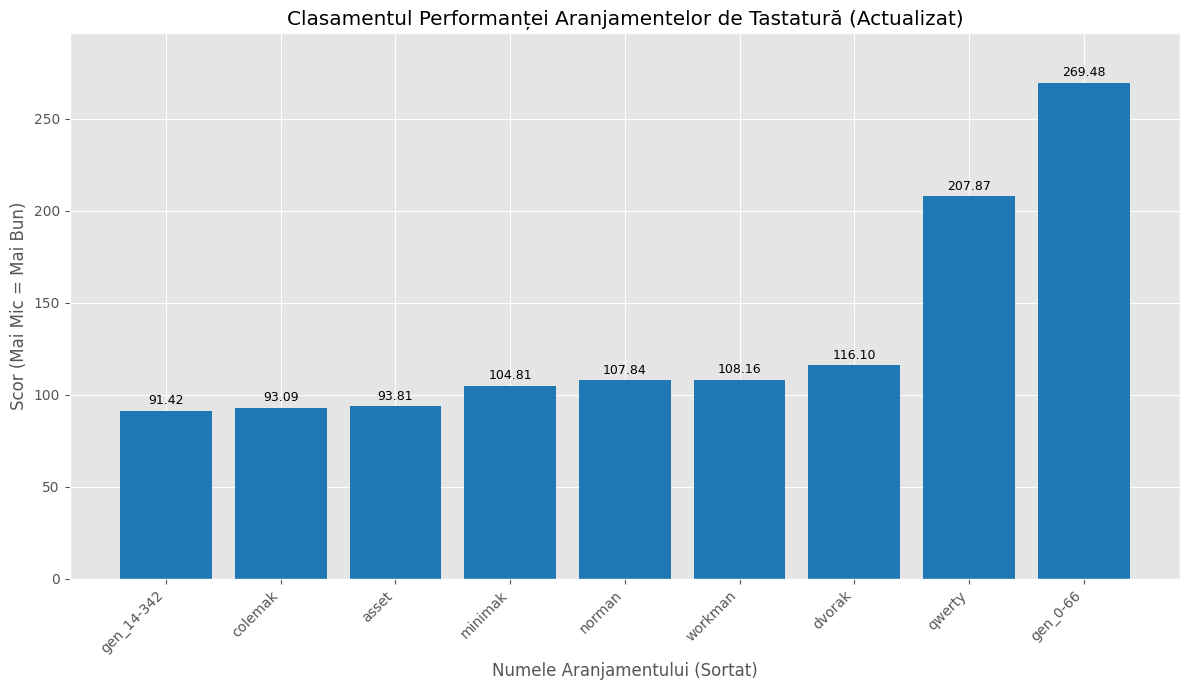

In [ ]:
import matplotlib.pyplot as plt
import io

# Datele brute actualizate, combinate din Generația 49 și layout-urile inițiale,
# sortate de la cel mai bun (scor mai mic) la cel mai slab (scor mai mare).
# Format: Rang Nume Scor Părinți
raw_data = """
1       gen_14-342              91.416176               gen_13-338, gen_9-256
3       colemak                 93.087774               Initial
4       asset                   93.811928               Initial
5       minimak                 104.807816              Initial
6       norman                  107.839720              Initial
7       workman                 108.157841              Initial
8       dvorak                  116.100283              Initial
9       qwerty                  207.866148              Initial
10      gen_0-66                269.477677              Initial
"""

def parse_and_plot_keyboard_data(data_string):
    """
    Parcurge datele despre aranjamentele de tastatură, le sortează după scor și 
    creează un grafic cu bare verticale.
    
    Scorul reprezintă un cost sau o metrică de efort (mai mic e mai bine).
    """
    data_list = []
    
    # Utilizează io.StringIO pentru a trata șirul de linii ca pe un fișier.
    for line in io.StringIO(data_string):
        # Elimină spațiile albe de la început/sfârșit și împarte după orice spațiu alb.
        parts = line.strip().split()
        
        # Ne așteptăm la cel puțin trei părți: Rang, Nume, Scor
        if len(parts) >= 3:
            try:
                name = parts[1]
                score = float(parts[2])
                data_list.append((name, score))
            except ValueError as e:
                print(f"Sări peste linia din cauza erorii de parsare a scorului: {line.strip()}. Eroare: {e}")
                continue
    
    # 1. Sortează lista de date după scor în ordine crescătoare (scorul mai mic este mai bun)
    # Deși datele sunt deja sortate în raw_data, funcția de sortare asigură ordinea corectă.
    sorted_data = sorted(data_list, key=lambda x: x[1])
    
    # 2. Separă numele și scorurile pentru plotare
    names = [item[0] for item in sorted_data]
    scores = [item[1] for item in sorted_data]
    
    # 3. Creează graficul cu bare verticale
    
    # Setează un stil profesional
    plt.style.use('ggplot') 
    
    # Creează o figură și un set de subgrafice
    # Ajustăm lățimea pentru a găzdui etichetele X lungi
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Creează graficul cu bare verticale (ax.bar)
    # Folosim numele sortate pentru axa X
    bars = ax.bar(names, scores, color='#1f77b4') 

    # Adaugă etichete și titlu în limba română
    ax.set_ylabel("Scor (Mai Mic = Mai Bun)")
    ax.set_title("Clasamentul Performanței Aranjamentelor de Tastatură (Actualizat)")
    ax.set_xlabel("Numele Aranjamentului (Sortat)")
    
    # Rotește etichetele axei X pentru a fi lizibile
    plt.xticks(rotation=45, ha='right')
    
    # Adaugă valoarea scorului deasupra fiecărei bare pentru claritate
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, # Centrat orizontal
            height + 2, # Poziționat puțin deasupra barei
            f'{height:.2f}', # Valoarea scorului formatată
            ha='center', # Aliniere orizontală
            va='bottom', # Aliniere verticală
            fontsize=9
        )
        
    # Ajustează limita axei Y pentru a lăsa spațiu pentru etichetele de scor
    ax.set_ylim(0, max(scores) * 1.1)
    
    # Utilizează tight_layout pentru a asigura că etichetele nu sunt tăiate
    plt.tight_layout()
    
    # Afișează graficul
    plt.show()

# Rulează funcția cu datele brute actualizate
parse_and_plot_keyboard_data(raw_data)